In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 5\stock_price_data.csv')

In [3]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31-Mar-21,291.02,294.00,294.42,290.26,47.00M,-0.76%
1,30-Mar-21,293.25,294.86,295.72,291.50,38.81M,-0.02%
2,29-Mar-21,293.30,289.72,294.09,289.26,43.68M,0.71%
3,26-Mar-21,291.22,288.63,292.75,288.32,56.07M,1.59%
4,25-Mar-21,286.66,286.50,287.03,283.85,35.22M,0.30%


In [4]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
306,10-Jan-20,258.19,257.86,259.25,256.88,18.85M,0.08%
307,9-Jan-20,257.99,259.40,261.76,257.01,38.33M,-0.45%
308,8-Jan-20,259.15,253.57,259.15,253.03,40.82M,2.07%
309,6-Jan-20,253.90,254.75,254.84,251.40,22.35M,-0.43%
310,3-Jan-20,255.00,255.99,258.19,253.70,35.85M,0.10%


In [5]:
data = data.drop(columns = ['Open', 'High', 'Low', 'Vol.', 'Change %'])

In [6]:
# sort data by Date
data = data.sort_values(by=['Date'])

In [7]:
data['Price'] = data['Price'].astype(float)

In [8]:
data.head()

,Date,Price
250,1-Apr-20,184.78
82,1-Dec-20,260.81
41,1-Feb-21,263.80
209,1-Jun-20,203.66
21,1-Mar-21,273.58


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 250 to 140
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    311 non-null    object 
 1   Price   311 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.3+ KB


In [10]:
# change 'Date' to a datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 250 to 140
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    311 non-null    datetime64[ns]
 1   Price   311 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.3 KB


In [12]:
data.head()

,Date,Price
250,2020-04-01,184.78
82,2020-12-01,260.81
41,2021-02-01,263.80
209,2020-06-01,203.66
21,2021-03-01,273.58


In [13]:
def lineplot(x,y,data_,title_):
    sns.set(rc = {'figure.figsize':(15,8)})
    # Bigger than normal fonts
    sns.set(font_scale=1.5)
    sns.set_style('darkgrid')
    chart = sns.lineplot(x = x, y = y, data = data_)
    chart.set(title=title_)
    plt.show()

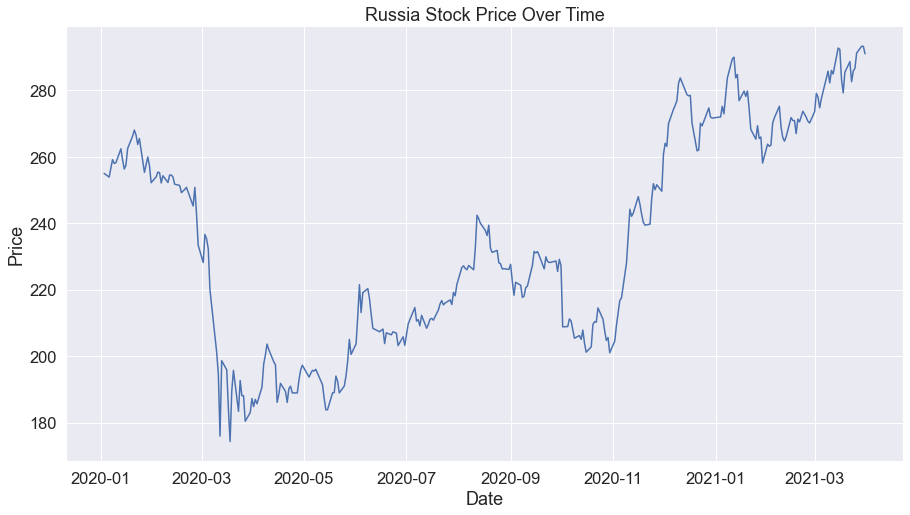

In [14]:
lineplot(x='Date',y='Price',data_=data,title_='Russia Stock Price Over Time')

A moving average is a statistical calculation used to analyze data points by creating a series of averages of different subsets of the full data set. It is commonly used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles.

**Simple Moving Average (SMA)**: This is the unweighted mean of the previous n data points. For example, a 10-day SMA is calculated by averaging the closing prices of the last 10 days.

SMA = (P1 + P2 + P3 + ... + Pn) /n



In [15]:
# **create train_data**
train_data = data[data.Date <= '2020-12-31']

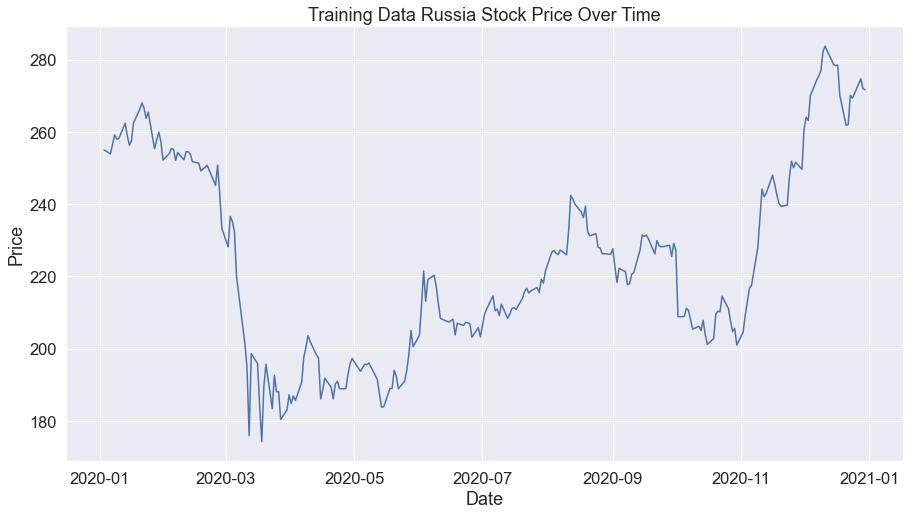

In [16]:
# plot the training data over time

lineplot(x='Date',y='Price',data_=train_data,title_='Training Data Russia Stock Price Over Time')

In [17]:
train_data.head()

,Date,Price
250,2020-04-01,184.78
82,2020-12-01,260.81
209,2020-06-01,203.66
124,2020-10-01,227.23
146,2020-09-01,227.64


Calculate the 30-day moving average using the training data


C:\Users\dgarb\AppData\Local\Temp/ipykernel_22188/1915249900.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['30_day_MA'] = train_data['Price'].rolling(window=window_size).mean()


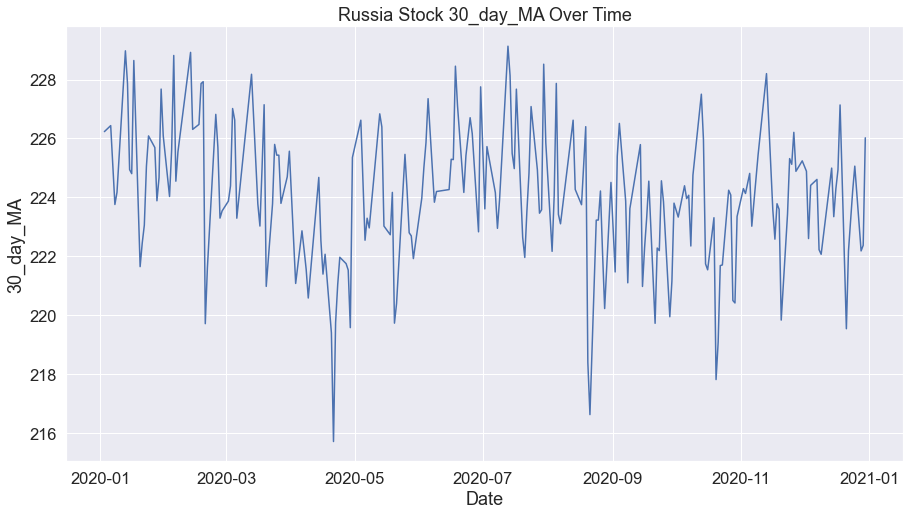

In [18]:
# Note: window size is the number of days you go back to calculate
window_size = 30
train_data['30_day_MA'] = train_data['Price'].rolling(window=window_size).mean()

# Plot the stock price and 30-day moving average of the Training Data
lineplot(x ='Date',y ='30_day_MA',data_= train_data,title_='Russia Stock 30_day_MA Over Time')

In [19]:
train_data

,Date,Price,30_day_MA
250,2020-04-01,184.78,NaN
82,2020-12-01,260.81,NaN
209,2020-06-01,203.66,NaN
124,2020-10-01,227.23,NaN
146,2020-09-01,227.64,NaN
...,...,...,...
184,2020-07-09,209.11,223.919333
203,2020-06-09,217.23,224.197333
98,2020-11-09,228.05,225.442333
118,2020-10-09,205.38,224.755000


**Extend Data for Forecasting**

To forecast using the moving average, you need to continue calculating the moving average into the forecast period. Since the moving average relies on past data, you'll use the most recent available data to predict future values.

**Generate Forecasts for Q1 2021**

In [21]:
# Calculate the 30-day moving average
window_size = 30
train_data['30_day_MA'] = train_data['Price'].rolling(window=window_size).mean()

C:\Users\dgarb\AppData\Local\Temp/ipykernel_22188/1610044791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['30_day_MA'] = train_data['Price'].rolling(window=window_size).mean()


In [24]:
# Define the forecast period (Q1 2021)
forecast_period = pd.date_range(start='2021-01-01', end='2021-03-31')

# Initialize a DataFrame to store the forecasted values
forecast_df = pd.DataFrame({'Date': forecast_period, 'Forecast': np.nan})

# forecast_df

In [26]:
# Use the last available 'window_size' days from the training data to start the forecast
last_window_data = train_data['Price'].iloc[-window_size:].values #generates Numpy array
# last_window_data

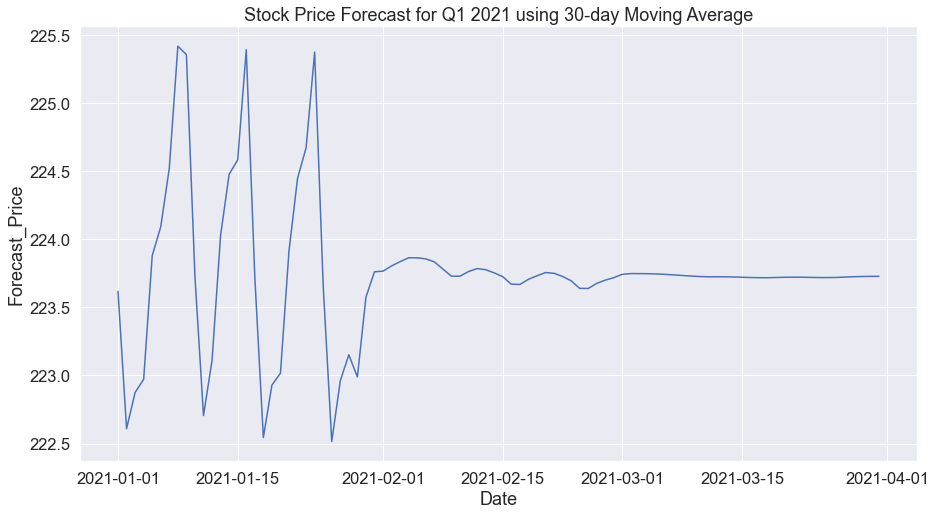

In [27]:
# Extend the forecast using the moving average logic
for i, date in enumerate(forecast_period):
    forecast_value = np.mean(last_window_data)
    forecast_df.at[i, 'Forecast'] = forecast_value
    # Update the window data by appending the forecast value and removing the oldest value
    last_window_data = np.append(last_window_data[1:], forecast_value)
    
# Rename columns for consistency in plotting
forecast_df = forecast_df.rename(columns={'Forecast': 'Forecast_Price'})

lineplot(x='Date', y='Forecast_Price', data_=forecast_df, title_='Stock Price Forecast for Q1 2021 using 30-day Moving Average')


In [30]:
test_data =data[data.Date > '2020-12-31']
# data.reset_index()

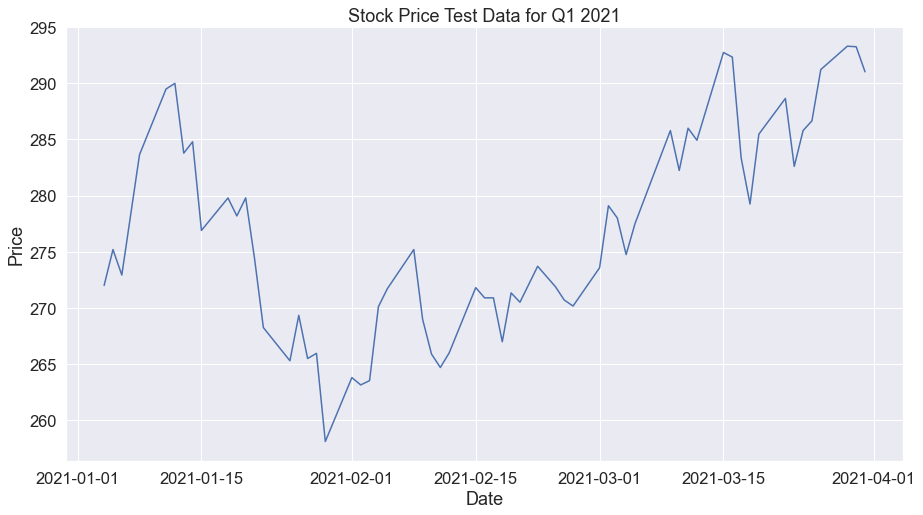

In [31]:
lineplot(x='Date', y='Price', data_=test_data, title_='Stock Price Test Data for Q1 2021')


In [32]:
# Merge test_data with forecast_df on 'Date'
merged_data = pd.merge(test_data, forecast_df, on='Date', how='outer')
merged_data.head()

,Date,Price,Forecast_Price
0,2021-02-01,263.80,223.766792
1,2021-03-01,273.58,223.743436
2,2021-02-10,265.90,223.729699
3,2021-03-10,282.24,223.727232
4,2021-02-11,264.70,223.763841


In [37]:
# Melt the data for easier plotting with Seaborn
melted_data = pd.melt(merged_data, id_vars=['Date'], value_vars=['Price', 'Forecast_Price'], 
                      var_name='Type', value_name='Value')
print(melted_data.head())
print(melted_data.tail())

        Date   Type   Value
0 2021-02-01  Price  263.80
1 2021-03-01  Price  273.58
2 2021-02-10  Price  265.90
3 2021-03-10  Price  282.24
4 2021-02-11  Price  264.70
          Date            Type       Value
175 2021-03-14  Forecast_Price  223.723828
176 2021-03-20  Forecast_Price  223.721824
177 2021-03-21  Forecast_Price  223.722336
178 2021-03-27  Forecast_Price  223.723059
179 2021-03-28  Forecast_Price  223.725845


In [38]:
def lineplot2 (x, y, hue, data_, title_):
    sns.set(rc={'figure.figsize': (15, 8)})
    sns.set(font_scale=1.5)
    sns.set_style('darkgrid')
    chart = sns.lineplot(x=x, y=y, hue=hue, data=data_)
    chart.set(title=title_)
    plt.show()

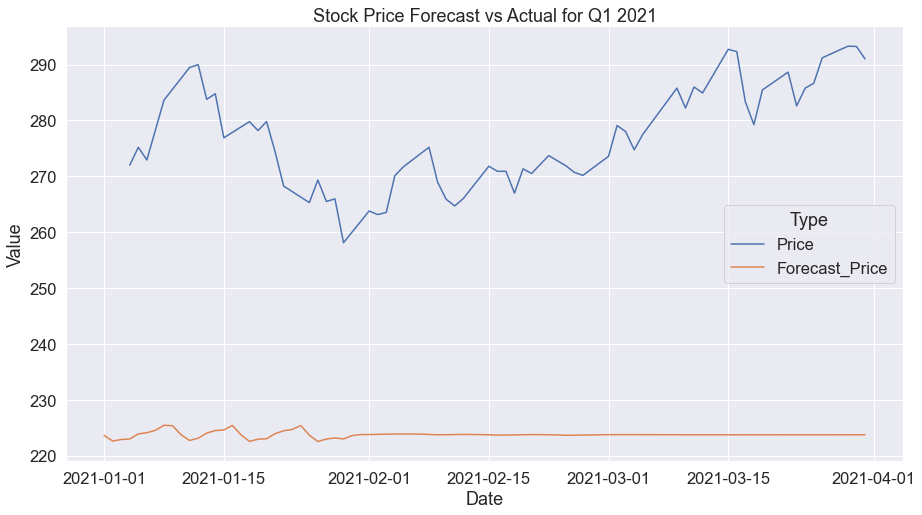

In [39]:
# Plot the results
lineplot2(x='Date', y='Value', hue='Type', data_=melted_data, title_='Stock Price Forecast vs Actual for Q1 2021')
